In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2022-04-29 13:46:20.868815: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Raw Data Loading

df = pd.read_csv('./data/class_csv/train_0429_color_80.csv')
display(df.head())
print(df.shape)   # (25000, 6401)

,label,0,1,2,3,4,5,6,7,8,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
0,21,23,16,16,59,54,65,34,25,20,...,69,47,44,51,97,93,97,31,26,30
1,61,123,125,-124,96,92,92,113,118,114,...,81,97,108,101,88,92,95,115,126,121
2,63,-107,-85,-94,124,-119,-114,123,-120,-124,...,-128,123,126,124,103,113,114,-89,-83,-86
3,9,-89,-120,96,120,98,76,117,93,71,...,60,120,96,71,104,87,68,104,83,65
4,40,54,65,96,59,70,104,61,73,110,...,98,54,67,104,65,79,116,56,65,98


(4277, 19201)


In [3]:
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


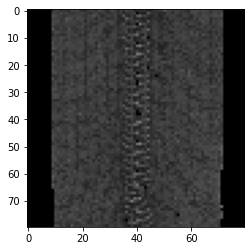

In [5]:
plt.imshow(x_data[152:153].reshape(80,80,3))
plt.show()

In [7]:
# data split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(x_data,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

# Normalization(정규화)
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [10]:
# model 생성

model = Sequential()

# CNN - Feature Extraction

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME',
                 input_shape=(80,80,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='SAME'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer
model.add(Flatten())
model.add(Dropout(rate=0.5))

# Hidden layer
model.add(Dense(units=256,
                activation='relu'))

# output layer
model.add(Dense(units=88,
                activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)             

In [11]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(norm_train_x_data.reshape(-1,80,80,3),
                    train_t_data.reshape(-1,1),
                    epochs=200,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

2022-04-29 13:52:49.771335: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160896000 exceeds 10% of free system memory.
2022-04-29 13:52:49.923760: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-29 13:52:49.942215: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/200


2022-04-29 13:52:50.356418: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-04-29 13:52:51.012543: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


21/21 [==============================] - ETA: 0s - loss: 4.1845 - accuracy: 0.0582

2022-04-29 13:52:56.153233: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 68966400 exceeds 10% of free system memory.


21/21 [==============================] - 7s 74ms/step - loss: 4.1706 - accuracy: 0.0593 - val_loss: 3.2388 - val_accuracy: 0.0579
Epoch 2/200
21/21 [==============================] - 1s 38ms/step - loss: 3.1172 - accuracy: 0.2266 - val_loss: 2.5546 - val_accuracy: 0.6114
Epoch 3/200
21/21 [==============================] - 1s 37ms/step - loss: 2.4091 - accuracy: 0.5727 - val_loss: 1.8293 - val_accuracy: 0.7194
Epoch 4/200
21/21 [==============================] - 1s 37ms/step - loss: 1.8010 - accuracy: 0.7138 - val_loss: 1.4560 - val_accuracy: 0.8140
Epoch 5/200
21/21 [==============================] - 1s 37ms/step - loss: 1.3612 - accuracy: 0.7799 - val_loss: 1.3310 - val_accuracy: 0.7940
Epoch 6/200
21/21 [==============================] - 1s 37ms/step - loss: 1.2991 - accuracy: 0.7834 - val_loss: 1.2475 - val_accuracy: 0.8107
Epoch 7/200
21/21 [==============================] - 1s 37ms/step - loss: 1.2173 - accuracy: 0.8011 - val_loss: 1.1872 - val_accuracy: 0.7906
Epoch 8/200
21/21 

21/21 [==============================] - 1s 38ms/step - loss: 0.1905 - accuracy: 0.9469 - val_loss: 0.7979 - val_accuracy: 0.8586
Epoch 116/200
21/21 [==============================] - 1s 38ms/step - loss: 0.1760 - accuracy: 0.9451 - val_loss: 0.8290 - val_accuracy: 0.8497
Epoch 117/200
21/21 [==============================] - 1s 38ms/step - loss: 0.2189 - accuracy: 0.9334 - val_loss: 0.8114 - val_accuracy: 0.8575
Epoch 118/200
21/21 [==============================] - 1s 38ms/step - loss: 0.1601 - accuracy: 0.9539 - val_loss: 0.8523 - val_accuracy: 0.8519
Epoch 119/200
21/21 [==============================] - 1s 38ms/step - loss: 0.2087 - accuracy: 0.9304 - val_loss: 0.7954 - val_accuracy: 0.8508
Epoch 120/200
21/21 [==============================] - 1s 38ms/step - loss: 0.1766 - accuracy: 0.9454 - val_loss: 0.7854 - val_accuracy: 0.8575
Epoch 121/200
21/21 [==============================] - 1s 38ms/step - loss: 0.1821 - accuracy: 0.9491 - val_loss: 0.8343 - val_accuracy: 0.8541
Epoch 

Epoch 172/200
21/21 [==============================] - 1s 39ms/step - loss: 0.1012 - accuracy: 0.9651 - val_loss: 1.0358 - val_accuracy: 0.8486
Epoch 173/200
21/21 [==============================] - 1s 38ms/step - loss: 0.1086 - accuracy: 0.9582 - val_loss: 1.0108 - val_accuracy: 0.8530
Epoch 174/200
21/21 [==============================] - 1s 39ms/step - loss: 0.1102 - accuracy: 0.9635 - val_loss: 1.0461 - val_accuracy: 0.8474
Epoch 175/200
21/21 [==============================] - 1s 39ms/step - loss: 0.0885 - accuracy: 0.9716 - val_loss: 1.0790 - val_accuracy: 0.8497
Epoch 176/200
21/21 [==============================] - 1s 39ms/step - loss: 0.0755 - accuracy: 0.9771 - val_loss: 1.0750 - val_accuracy: 0.8508
Epoch 177/200
21/21 [==============================] - 1s 39ms/step - loss: 0.1008 - accuracy: 0.9645 - val_loss: 1.0669 - val_accuracy: 0.8497
Epoch 178/200
21/21 [==============================] - 1s 39ms/step - loss: 0.0913 - accuracy: 0.9711 - val_loss: 1.0310 - val_accuracy:

In [14]:
result = model.evaluate(norm_test_x_data.reshape(-1,80,80,3),
                        test_t_data.reshape(-1,1))
print(result)
#        loss                accuracy
# [0.8666917681694031, 0.7685333490371704]

31/41 [=====================>........] - ETA: 0s - loss: 1.0401 - accuracy: 0.8589

2022-04-29 13:56:22.796404: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 98611200 exceeds 10% of free system memory.


41/41 [==============================] - 0s 5ms/step - loss: 1.1358 - accuracy: 0.8505
[1.1358495950698853, 0.8504672646522522]
